In [94]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#load image
image = cv2.imread('berry.jpg')

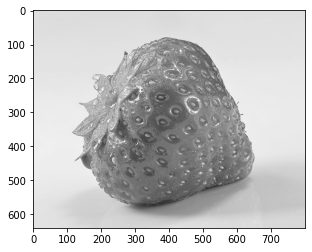

In [96]:
#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

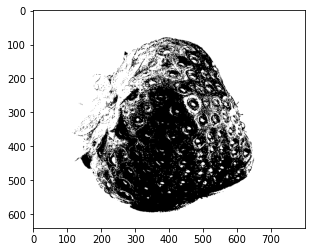

In [60]:
#binary thresholding
threshold_value = 140
_, binary_image = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.show()

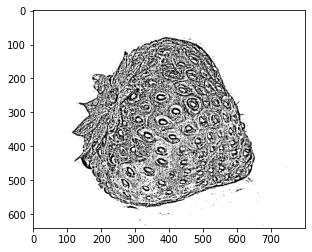

In [61]:
#adaptive thresholding
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)               

plt.imshow(adaptive, cmap='gray')
plt.show()

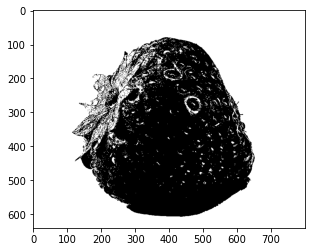

In [21]:
#otsu thresholding
#cv2.threshold() automatically computes threshold values and applies binary thresholding
_, otsu_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu_image, cmap='gray')
plt.show()

In [100]:
#invert otsu_image to create mask
otsu_image = 255 - otsu_image

In [101]:
#find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [103]:
# Create a mask to separate the object from the background
mask = np.zeros_like(image)

In [104]:
# Draw contours on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

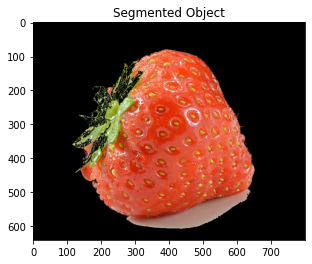

In [110]:
#apply mask to the original image to segment the object
masked_image = cv2.bitwise_and(image, mask)

plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Object')
plt.show()

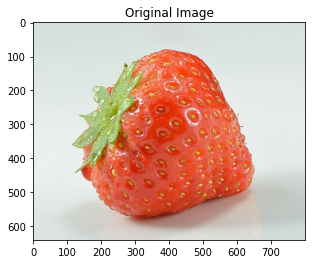

In [111]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()